## Training Models with Linear Regression



### Create Training Data

In [309]:
#import libraries
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

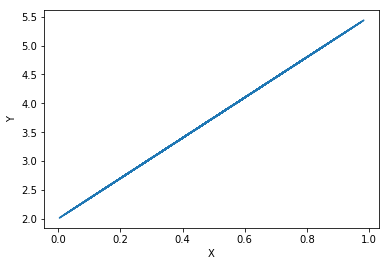

In [310]:
# Generate Samle Points
a_data=3.5
b_data=2

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * a_data + b_data


plt.plot(x_data,y_data) 
plt.ylabel('Y')
plt.xlabel('X')
plt.show()



In [311]:
#Add Noise
def add_noise(y):
   return y+np.random.normal(loc=0.0, scale=0.5)
y_data = map(add_noise,y_data)

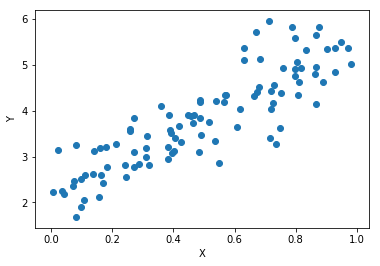

In [312]:
plt.scatter(x_data,y_data) 
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

### Data Graph

In [313]:
# to Solve
a = tf.Variable(np.random.normal(loc=1.0, scale=1.0), name = 'A')
b = tf.Variable(np.random.normal(loc=1.0, scale=1.0), name = 'B')

y = a * x_data + b


In [314]:
#loss function
loss = tf.reduce_mean(tf.square(y - y_data))


In [315]:
#optimiser
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate)


In [316]:
#trainer
train = optimizer.minimize(loss)

In [317]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [318]:
for step in range(10):
    result = session.run(train)
    print(session.run([a,b,loss]))

[1.3321536, 1.4348023, 3.5468764]
[1.5328703, 1.7813447, 2.1448984]
[1.6864363, 2.0387261, 1.3595233]
[1.8046948, 2.2294424, 0.91911125]
[1.8965042, 2.3703187, 0.67170221]
[1.9684907, 2.4739392, 0.53228658]
[2.0256107, 2.5497155, 0.4533087]
[2.0715718, 2.604687, 0.40816414]
[2.1091478, 2.6441183, 0.38196948]
[2.1404133, 2.6719468, 0.36639845]


In [319]:
epochs = 400
display_epochs = 40

for step in range(epochs):
    result = session.run(train)
    if step % display_epochs == 0:
        print(session.run([a,b,loss]))
        

a_val = session.run(a)
b_val = session.run(b)


[2.1669209, 2.691117, 0.35679242]
[2.612169, 2.555047, 0.29425603]
[2.8610237, 2.4240644, 0.27421859]
[3.0140331, 2.3435287, 0.26664346]
[3.1081121, 2.2940109, 0.26377967]
[3.165956, 2.2635648, 0.2626971]
[3.2015219, 2.2448452, 0.26228783]
[3.2233896, 2.233335, 0.26213309]
[3.2368355, 2.2262576, 0.26207459]
[3.2451026, 2.2219064, 0.26205251]


### Plot output

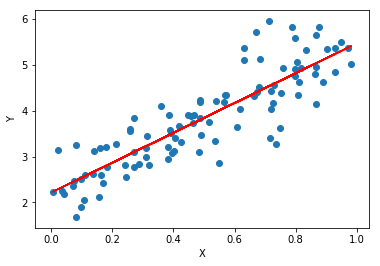

In [320]:
#trainning data
plt.scatter(x_data,y_data) 

# Trained line
a_val = session.run(a)
b_val = session.run(b)
y2 = a_val * x_data + b_val

plt.plot(x_data,y2,color="red")



plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [321]:
session.close()